# Analysis of a TMDB with approx. 5000 movies to figure out how to hypothetically make the most profitable movie.

In [346]:
from IPython.display import HTML


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [348]:
##My import cell
%matplotlib inline
import re
import requests
import textblob
import string
from datetime import datetime,date
import random
from scipy.misc import imread
from wordcloud import *
import os
import numpy as np
from collections import Counter
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sbn
import math
from nltk.corpus import stopwords
import textatistic
from bs4 import BeautifulSoup
from subprocess import check_output
matplotlib.style.use('ggplot')
import psycopg2
from pylab import rcParams
py.offline.init_notebook_mode()

In [112]:
##Read in my two csv files from Kaggle
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [113]:
whole1 = pd.merge(credits,movies, left_index=True, right_index=True)
del whole1['movie_id']
whole1 = whole1.rename(columns = {'title_x':'title'})

In [347]:
whole2 = whole1[['title','tagline','overview','runtime','id','budget','revenue','status','popularity','vote_average','vote_count','cast','genres','status','release_date','spoken_languages','original_language','production_companies','crew']]
whole2['profit'] = whole2['revenue'] - whole2['budget']

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Now that we have our database the way we want it we can begin to examine some of our variables.

In [122]:
print('Average revenue earned by the movies is $',round(whole2['revenue'].mean(),2))
print('Average vote score earned by the movies is',round(whole2['vote_average'].mean(),2))
print('Average budget of the movies is $',round(whole2['budget'].mean(),2))
print('Average profit of the movies is $',round(whole2['profit'].mean(),2))

Average revenue earned by the movies is $ 82260638.65
Average vote score earned by the movies is 6.09
Average budget of the movies is $ 29045039.88
Average profit of the movies is $ 53215598.78


# When do we want to release our movie?

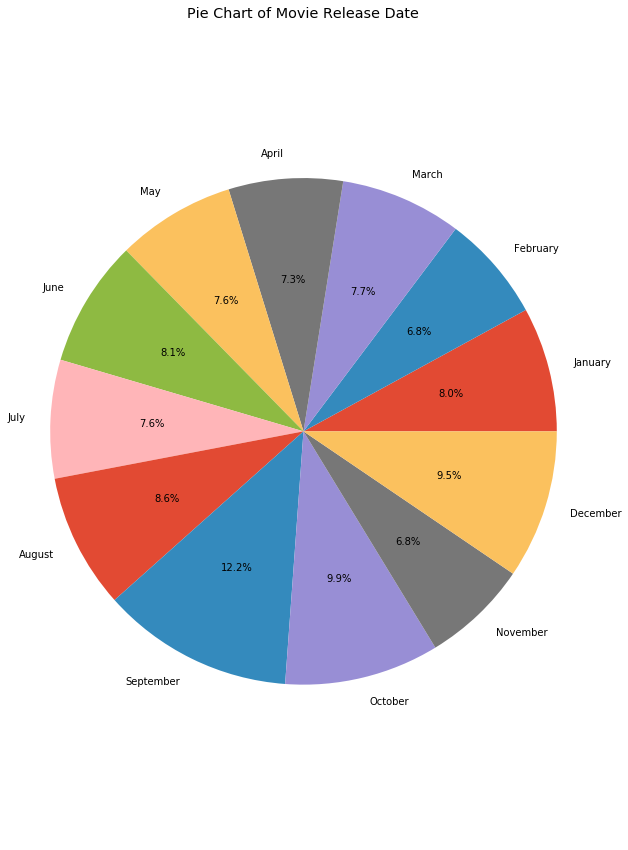

In [223]:
date_dist = whole2[['title','release_date','vote_average']]
jan=[]
jan_av=[]
feb=[]
feb_av=[]
mar=[]
mar_av=[]
april=[]
april_av=[]
may=[]
may_av=[]
june=[]
june_av=[]
july=[]
july_av=[]
aug=[]
aug_av=[]
sept=[]
sept_av=[]
octo=[]
octo_av=[]
nov=[]
nov_av=[]
dec=[]
dec_av=[]

#print(date_dist)
for i in date_dist['release_date']:
    if type(i) == float:
        del(i)
    else:
        d=datetime.strptime(i, '%Y-%m-%d')             #d is of type datetime
    #    print(d)
        month = d.month                                 #month is of type interger
        month = str(month)                              #we make month a string so that we know everything is a string
    #    print(month)
        if month == '1':
            jan.append(month)
        elif month == '2':
            feb.append(month)
        elif month == '3':
            mar.append(month)
        elif month == '4':
            april.append(month)
        elif month == '5':
            may.append(month)
        elif month == '6':
            june.append(month)
        elif month == '7':
            july.append(month)
        elif month == '8':
            aug.append(month)
        elif month == '9':
            sept.append(month)
        elif month == '10':
            octo.append(month)
        elif month == '11':
            nov.append(month)
        elif month == '12':
            dec.append(month) 
            

january = len(jan)
february = len(feb)
march = len(mar)
april = len(april)
may = len(may)
june = len(june)
july = len(july)
august = len(aug)
september = len(sept)
october = len(octo)
november = len(nov)
december = len(dec)


labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
values = [january,february,march,april,may,june,july,august,september,october,november,december]

plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title('Pie Chart of Movie Release Date')
plt.axis('equal')
plt.show()


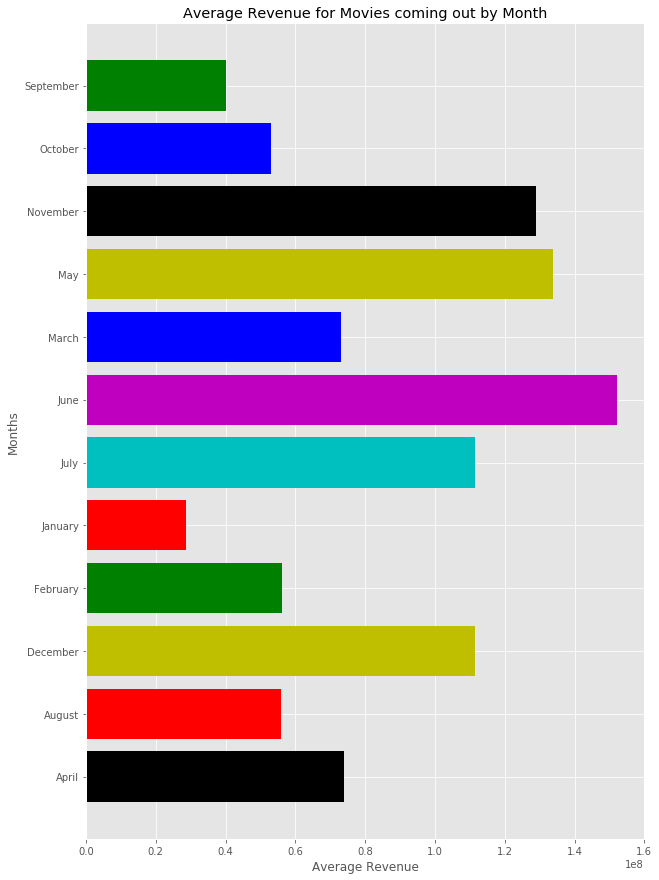

In [224]:
whole4 = whole2[['title','revenue','release_date','profit']]
whole4.head()

jan_av_rev =[]
feb_av_rev =[]
mar_av_rev =[]
april_av_rev =[]
may_av_rev =[]
june_av_rev =[]
july_av_rev =[]
aug_av_rev =[]
sept_av_rev =[]
octo_av_rev =[]
nov_av_rev =[]
dec_av_rev =[]

for i in range(4803):
    date = whole4['release_date'][i]
    date = str(date)
    date = date.split('-')
    try:
        month = date[1]
    except IndexError:
        month = 'null'
    #print(month)
    if month == '01':
        jan_av_rev.append(whole4['revenue'][i])
    elif month == '02':
        feb_av_rev.append(whole4['revenue'][i])
    elif month == '03':
        mar_av_rev.append(whole4['revenue'][i])
    elif month == '04':
        april_av_rev.append(whole4['revenue'][i])
    elif month == '05':
        may_av_rev.append(whole4['revenue'][i])
    elif month == '06':
        june_av_rev.append(whole4['revenue'][i])
    elif month == '07':
        july_av_rev.append(whole4['revenue'][i])
    elif month == '08':
        aug_av_rev.append(whole4['revenue'][i])
    elif month == '09':
        sept_av_rev.append(whole4['revenue'][i])
    elif month == '10':
        octo_av_rev.append(whole4['revenue'][i])
    elif month == '11':
        nov_av_rev.append(whole4['revenue'][i])
    elif month == '12':
        dec_av_rev.append(whole4['revenue'][i])
        
        
jan_av_rev = np.mean(jan_av_rev)
feb_av_rev = np.mean(feb_av_rev)
mar_av_rev = np.mean(mar_av_rev)
april_av_rev = np.mean(april_av_rev)
may_av_rev = np.mean(may_av_rev)
june_av_rev = np.mean(june_av_rev)
july_av_rev = np.mean(july_av_rev)
aug_av_rev = np.mean(aug_av_rev)
sept_av_rev = np.mean(sept_av_rev)
octo_av_rev = np.mean(octo_av_rev)
nov_av_rev = np.mean(nov_av_rev)
dec_av_rev = np.mean(dec_av_rev)

month_rev_averages = [jan_av_rev,feb_av_rev,mar_av_rev,april_av_rev,may_av_rev,june_av_rev,july_av_rev,aug_av_rev,sept_av_rev,octo_av_rev,nov_av_rev,dec_av_rev]
my_colors = 'rgbkymc'

plt.barh(labels,month_rev_averages,align='center',color=my_colors)
plt.title("Average Revenue for Movies coming out by Month")
plt.ylabel('Months')
plt.xlabel('Average Revenue')
rcParams['figure.figsize'] = (10,15)

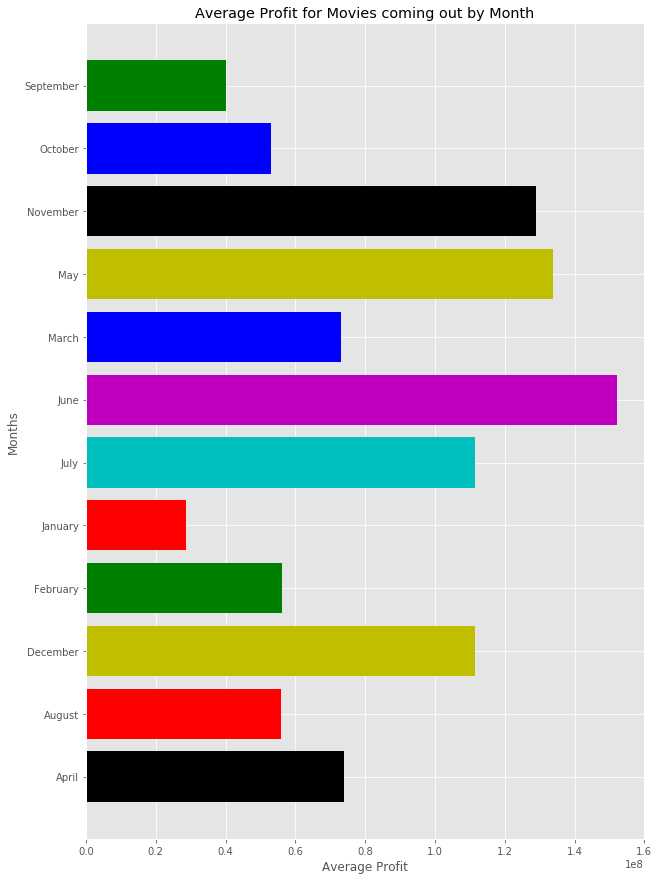

In [225]:
jan_av_prof =[]
feb_av_prof =[]
mar_av_prof =[]
april_av_prof =[]
may_av_prof =[]
june_av_prof =[]
july_av_prof =[]
aug_av_prof =[]
sept_av_prof =[]
octo_av_prof =[]
nov_av_prof =[]
dec_av_prof =[]

for i in range(4803):
    date = whole4['release_date'][i]
    date = str(date)
    date = date.split('-')
    try:
        month = date[1]
    except IndexError:
        month = 'null'
    #print(month)
    if month == '01':
        jan_av_prof.append(whole4['profit'][i])
    elif month == '02':
        feb_av_prof.append(whole4['profit'][i])
    elif month == '03':
        mar_av_prof.append(whole4['profit'][i])
    elif month == '04':
        april_av_prof.append(whole4['profit'][i])
    elif month == '05':
        may_av_prof.append(whole4['profit'][i])
    elif month == '06':
        june_av_prof.append(whole4['profit'][i])
    elif month == '07':
        july_av_prof.append(whole4['profit'][i])
    elif month == '08':
        aug_av_prof.append(whole4['profit'][i])
    elif month == '09':
        sept_av_prof.append(whole4['profit'][i])
    elif month == '10':
        octo_av_prof.append(whole4['profit'][i])
    elif month == '11':
        nov_av_prof.append(whole4['profit'][i])
    elif month == '12':
        dec_av_prof.append(whole4['profit'][i])
        
        
jan_av_prof = np.mean(jan_av_prof)
feb_av_prof = np.mean(feb_av_prof)
mar_av_prof = np.mean(mar_av_prof)
april_av_prof = np.mean(april_av_prof)
may_av_prof = np.mean(may_av_prof)
june_av_prof = np.mean(june_av_prof)
july_av_prof = np.mean(july_av_prof)
aug_av_prof = np.mean(aug_av_prof)
sept_av_prof = np.mean(sept_av_prof)
octo_av_prof = np.mean(octo_av_prof)
nov_av_prof = np.mean(nov_av_prof)
dec_av_prof = np.mean(dec_av_prof)

month_prof_averages = [jan_av_prof,feb_av_prof,mar_av_prof,april_av_prof,may_av_prof,june_av_prof,july_av_prof,aug_av_prof,sept_av_prof,octo_av_prof,nov_av_prof,dec_av_prof]
my_colors = 'rgbkymc'

plt.barh(labels,month_rev_averages,align='center',color=my_colors)
plt.title("Average Profit for Movies coming out by Month")
plt.ylabel('Months')
plt.xlabel('Average Profit')
rcParams['figure.figsize'] = (10,15)

# How long do we want our movie to be?

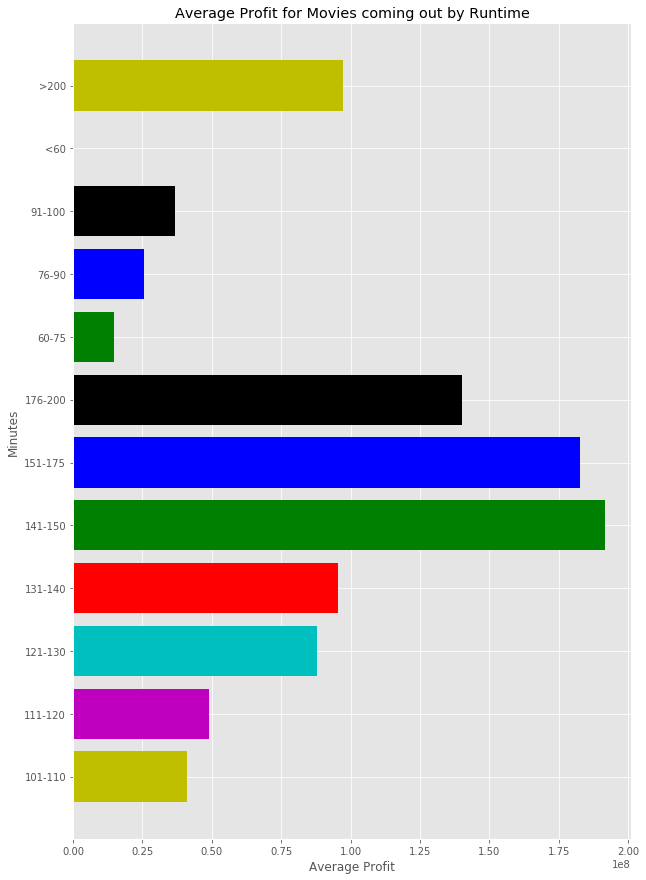

In [226]:
runtime60 = []
runtime75 = []
runtime90 = []
runtime100 = []
runtime110 = []
runtime120 = []
runtime130 = []
runtime140 = []
runtime150 = []
runtime175 = []
runtime200 = []
runtime300 = []

runtime_work = whole2[['title','runtime','profit']]
runtime_work.head()
for i in range(4803):
    profit_4runtime = runtime_work['profit'].iloc[[i]]
    time_4runtime = runtime_work['runtime'].iloc[[i]]
    time_4runtime = float(time_4runtime)
    profit_4runtime = int(profit_4runtime)
    if time_4runtime <= 59:
        runtime60.append(profit_4runtime)
    elif time_4runtime <= 75 and time_4runtime > 59:
        runtime75.append(profit_4runtime)
    elif time_4runtime <= 90 and time_4runtime > 75:
        runtime90.append(profit_4runtime)
    elif time_4runtime <= 100 and time_4runtime > 90:
        runtime100.append(profit_4runtime)
    elif time_4runtime <= 110 and time_4runtime > 100:
        runtime110.append(profit_4runtime)
    elif time_4runtime <= 120 and time_4runtime > 110:
        runtime120.append(profit_4runtime)
    elif time_4runtime <= 130 and time_4runtime > 120:
        runtime130.append(profit_4runtime)
    elif time_4runtime <= 140 and time_4runtime > 130:
        runtime140.append(profit_4runtime)
    elif time_4runtime <= 150 and time_4runtime > 140:
        runtime150.append(profit_4runtime)
    elif time_4runtime <= 175 and time_4runtime > 150:
        runtime175.append(profit_4runtime)
    elif time_4runtime <= 200 and time_4runtime > 175:
        runtime200.append(profit_4runtime)
    elif time_4runtime > 200:
        runtime300.append(profit_4runtime)

runtime59orless = np.mean(runtime60)
runtime60to75 = np.mean(runtime75)
runtime75to90 = np.mean(runtime90)
runtime90to100 = np.mean(runtime100)
runtime100to110 = np.mean(runtime110)
runtime110to120 = np.mean(runtime120)
runtime120to130 = np.mean(runtime130)
runtime130to140 = np.mean(runtime140)
runtime140to150 = np.mean(runtime150)
runtime150to175 = np.mean(runtime175)
runtime175to200 = np.mean(runtime200)
runtime200ormore = np.mean(runtime300)

runtime_prof_av = [runtime60orless,runtime60to75,runtime75to90,runtime90to100,runtime100to110,runtime110to120,runtime120to130,runtime130to140,runtime140to150,runtime150to175,runtime175to200,runtime200ormore]
labels2 = ['<60','60-75','76-90','91-100','101-110','111-120','121-130','131-140','141-150','151-175','176-200','>200']

plt.barh(labels2,runtime_prof_av,align='center',color=my_colors)
plt.title("Average Profit for Movies coming out by Runtime")
plt.ylabel('Minutes')
plt.xlabel('Average Profit')
rcParams['figure.figsize'] = (10,15)

# What type of movie do we want to make Genre wise?

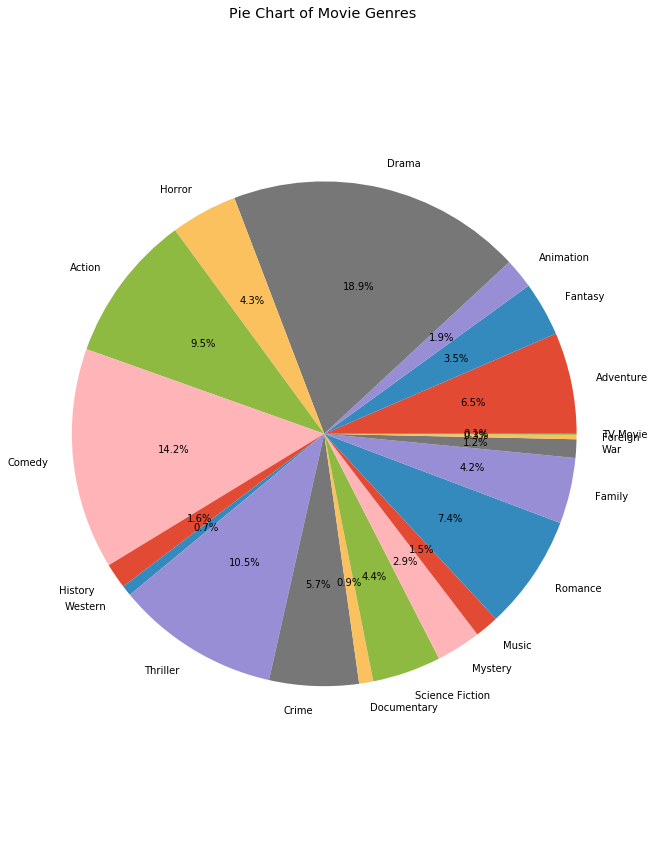

In [230]:
whole_genre = whole2[['title','vote_average','revenue','runtime','genres','profit']]

adventure = []
fantasy = []
animation = []
drama = []
horror = []
action = []
comedy = []
history = []
western = []
thriller = []
crime = []
doc = []
sci_fi = []
mystery = []
music = []
romance = []
family = []
war = []
foreign = []
tv = []

whole_genre.head()
get_genre = whole_genre['genres']
for i in get_genre:
    single_line = i
    list2 = eval(single_line)
    
    for i in list2:
        genre_dict[i['id']] = i['name']
        
    for i in list2:
        if i['id'] == 12:
            adventure.append(i['name'])
            
    for i in list2:
        if i['id'] == 14:
            fantasy.append(i['name'])
            
    for i in list2:
        if i['id'] == 16:
            animation.append(i['name'])
            
    for i in list2:
        if i['id'] == 18:
            drama.append(i['name'])
            
    for i in list2:
        if i['id'] == 27:
            horror.append(i['name'])
            
    for i in list2:
        if i['id'] == 28:
            action.append(i['name'])
            
    for i in list2:
        if i['id'] == 35:
            comedy.append(i['name'])
            
    for i in list2:
        if i['id'] == 36:
            history.append(i['name'])
            
    for i in list2:
        if i['id'] == 37:
            western.append(i['name'])
            
    for i in list2:
        if i['id'] == 53:
            thriller.append(i['name'])
            
    for i in list2:
        if i['id'] == 80:
            crime.append(i['name'])
            
    for i in list2:
        if i['id'] == 99:
            doc.append(i['name'])
            
    for i in list2:
        if i['id'] == 878:
            sci_fi.append(i['name'])
            
    for i in list2:
        if i['id'] == 9648:
            mystery.append(i['name'])
            
    for i in list2:
        if i['id'] == 10402:
            music.append(i['name'])
            
    for i in list2:
        if i['id'] == 10749:
            romance.append(i['name'])
            
    for i in list2:
        if i['id'] == 10751:
            family.append(i['name'])
            
    for i in list2:
        if i['id'] == 10752:
            war.append(i['name'])
            
    for i in list2:
        if i['id'] == 10769:
            foreign.append(i['name'])
            
    for i in list2:
        if i['id'] == 10770:
            tv.append(i['name'])

adventure = len(adventure)
fantasy = len(fantasy)
animation = len(animation)
drama = len(drama)
horror = len(horror)
action = len(action)
comedy = len(comedy)
history = len(history)
western = len(western)
thriller = len(thriller)
crime = len(crime)
doc = len(doc)
sci_fi = len(sci_fi)
mystery = len(mystery)
music = len(music)
romance = len(romance)
family = len(family)
war = len(war)
foreign = len(foreign)
tv = len(tv)

total_genres = [adventure,fantasy,animation,drama,horror,action,comedy,history,western,thriller,crime,doc,sci_fi,mystery,music,romance,family,war,foreign,tv]
label_gen = ['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History','Western','Thriller','Crime','Documentary','Science Fiction','Mystery','Music','Romance','Family','War','Foreign','TV Movie']

plt.pie(total_genres, labels = label_gen, autopct='%1.1f%%')
plt.title('Pie Chart of Movie Genres')
plt.axis('equal')
plt.show()


In [349]:
whole_genre = whole2[['title','vote_average','revenue','runtime','genres','profit']]
genre_dict={}
listofgenres = ['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History','Western','Thriller','Crime','Documentary','Science Fiction','Mystery','Music','Romance','Family','War','Foreign','TV']
for item in listofgenres:
    genre_dict[item] = []
whole_genre.head()
get_genre = whole_genre
for index, row in get_genre.iterrows():
    new_list = eval(row['genres'])
    for i in new_list:
#        print(i)
        if i['name'] == 'Action':
            genre_dict['Action'].append(row['profit'])
        elif i['name'] == 'Fantasy':
            genre_dict['Fantasy'].append(row['profit'])
        elif i['name'] == 'Animation':
            genre_dict['Animation'].append(row['profit'])   
        elif i['name'] == 'Drama':
            genre_dict['Drama'].append(row['profit']) 
        elif i['name'] == 'Horror':
            genre_dict['Horror'].append(row['profit']) 
        elif i['name'] == 'Comedy':
            genre_dict['Comedy'].append(row['profit']) 
        elif i['name'] == 'History':
            genre_dict['History'].append(row['profit']) 
        elif i['name'] == 'Adventure':
            genre_dict['Adventure'].append(row['profit']) 
        elif i['name'] == 'Western':
            genre_dict['Western'].append(row['profit']) 
        elif i['name'] == 'Thriller':
            genre_dict['Thriller'].append(row['profit'])
        elif i['name'] == 'Crime':
            genre_dict['Crime'].append(row['profit']) 
        elif i['name'] == 'Documentary':
            genre_dict['Documentary'].append(row['profit']) 
        elif i['name'] == 'Science Fiction':
            genre_dict['Science Fiction'].append(row['profit']) 
        elif i['name'] == 'Mystery':
            genre_dict['Mystery'].append(row['profit'])
        elif i['name'] == 'Music':
            genre_dict['Music'].append(row['profit'])
        elif i['name'] == 'Romance':
            genre_dict['Romance'].append(row['profit']) 
        elif i['name'] == 'Family':
            genre_dict['Family'].append(row['profit'])
        elif i['name'] == 'War':
            genre_dict['War'].append(row['profit'])
        elif i['name'] == 'Foreign':
            genre_dict['Foreign'].append(row['profit']) 
        elif i['name'] == 'TV Movie':
            genre_dict['TV'].append(row['profit'])

gen_labels = ['History','Fantasy','Drama','Foreign','Mystery','Adventure','Action','TV Movie','Horror','Western','Thriller','Crime','Music','Romance','Animation','Science Fiction','Family','War','Documentary','Family']
values = []
for k,v in genre_dict.items():
    prof_av_g = sum(v)/len(v)
    values.append(prof_av_g)

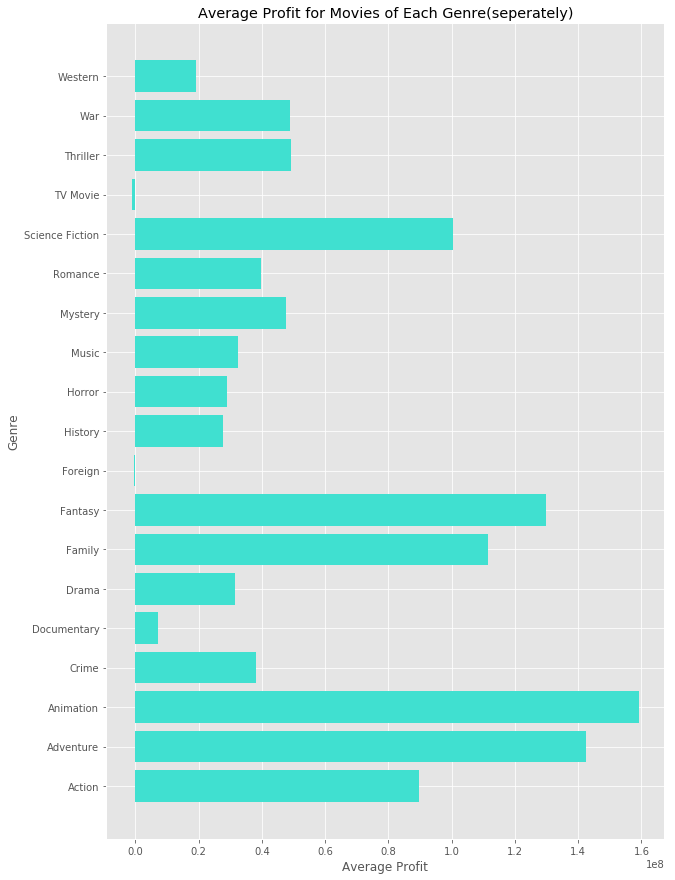

In [331]:
plt.barh(gen_labels,values,align='center',color='turquoise')
plt.title("Average Profit for Movies of Each Genre(seperately)")
plt.ylabel('Genre')
plt.xlabel('Average Profit')
rcParams['figure.figsize'] = (10,15)

# Let's work and see if we want to pair with any companies because they have such a good record of high profits

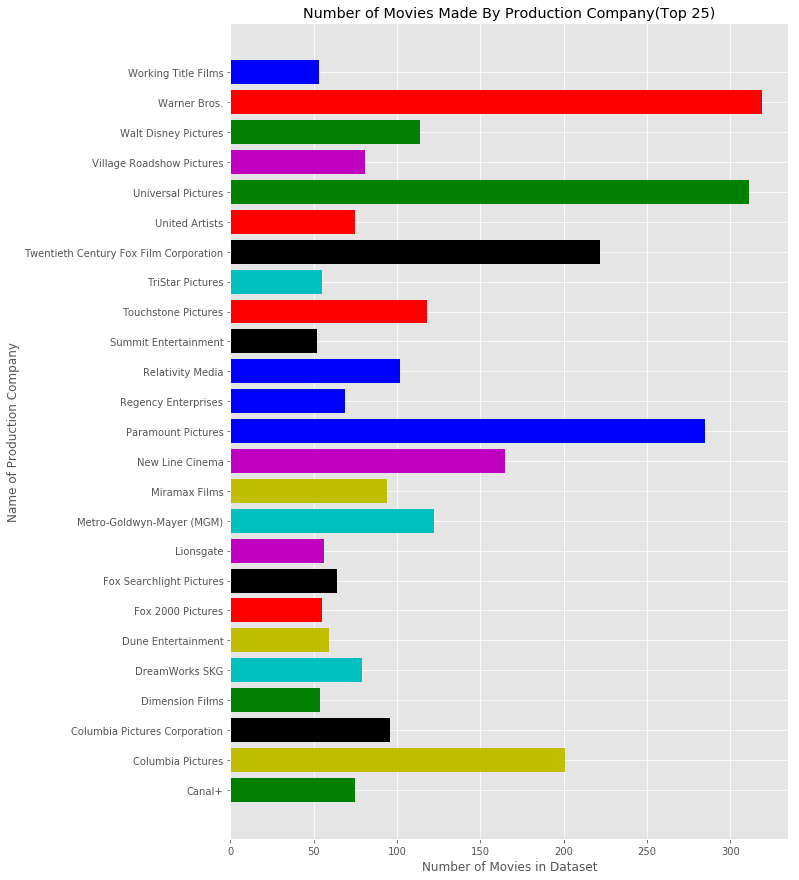

In [333]:
prod_company = whole2[['title','production_companies','revenue','vote_average','profit']]
comp_dict = {}
comp_list = []
prod_company.head()
get_comp = prod_company['production_companies']
for i in get_comp:
    single_line = i
    list2 = eval(single_line)
    for i in list2:
        comp_list.append(i['name'])
        comp_dict[i.get('id')] = i.get('name')
occur_comp = Counter(comp_list)
top25_comp = occur_comp.most_common(25)

names = [top25_comp[item][0] for item in range(len(top25_comp))]
values = [top25_comp[item][1] for item in range(len(top25_comp))]

my_colors = 'rgbkymc'
plt.barh(names, values, align = 'center', color = my_colors)

plt.title('Number of Movies Made By Production Company(Top 25)')
plt.xlabel('Number of Movies in Dataset')
plt.ylabel('Name of Production Company')
plt.grid(True)

plt.show()

plt.rcParams['figure.figsize'] = (10,15)

# print(type(occur_comp))
#print(comp_dict)
#len(comp_dict)

In [343]:
prodcomp_dict={}
listofcomps = ['Warner Bros.','Walt Disney Pictures','Universal Pictures','Twentieth Century Fox Film Corporation','Touchstone Pictures','Paramount Pictures','New Line Cinema','MGM','Columbia Pictures','DreamWorks SKG','Lionsgate']
for item in listofcomps:
    prodcomp_dict[item] = []
prod_company.head()
for index, row in prod_company.iterrows():
    new_list1 = eval(row['production_companies'])
    for i in new_list1:
#        print(i)
        if i['name'] == 'Warner Bros.':
            prodcomp_dict['Warner Bros.'].append(row['profit'])
        elif i['name'] == 'Walt Disney Pictures':
            prodcomp_dict['Walt Disney Pictures'].append(row['profit'])
        elif i['name'] == 'Universal Pictures':
            prodcomp_dict['Universal Pictures'].append(row['profit'])   
        elif i['name'] == 'Twentieth Century Fox Film Corporation':
            prodcomp_dict['Twentieth Century Fox Film Corporation'].append(row['profit']) 
        elif i['name'] == 'Touchstone Pictures':
            prodcomp_dict['Touchstone Pictures'].append(row['profit']) 
        elif i['name'] == 'Paramount Pictures':
            prodcomp_dict['Paramount Pictures'].append(row['profit']) 
        elif i['name'] == 'New Line Cinema':
            prodcomp_dict['New Line Cinema'].append(row['profit']) 
        elif i['name'] == 'Metro-Goldwyn-Mayer (MGM)':
            prodcomp_dict['MGM'].append(row['profit']) 
        elif i['name'] == 'Columbia Pictures':
            prodcomp_dict['Columbia Pictures'].append(row['profit']) 
        elif i['name'] == 'DreamWorks SKG':
            prodcomp_dict['DreamWorks SKG'].append(row['profit'])
        elif i['name'] == 'Lionsgate':
            prodcomp_dict['Lionsgate'].append(row['profit']) 

pc_labels = ['Walt Disney Pictures','Universal Pictures','Twentieth Century Fox Film Corporation','New Line Cinema','MGM','DreamWorks SKG','Warner Bros.','Lionsgate','Paramount Pictures','Columbia Pictures','Touchstone Pictures']
values = []
for k,v in prodcomp_dict.items():
    avprof_prodcomp = sum(v)/len(v)
    values.append(avprof_prodcomp)

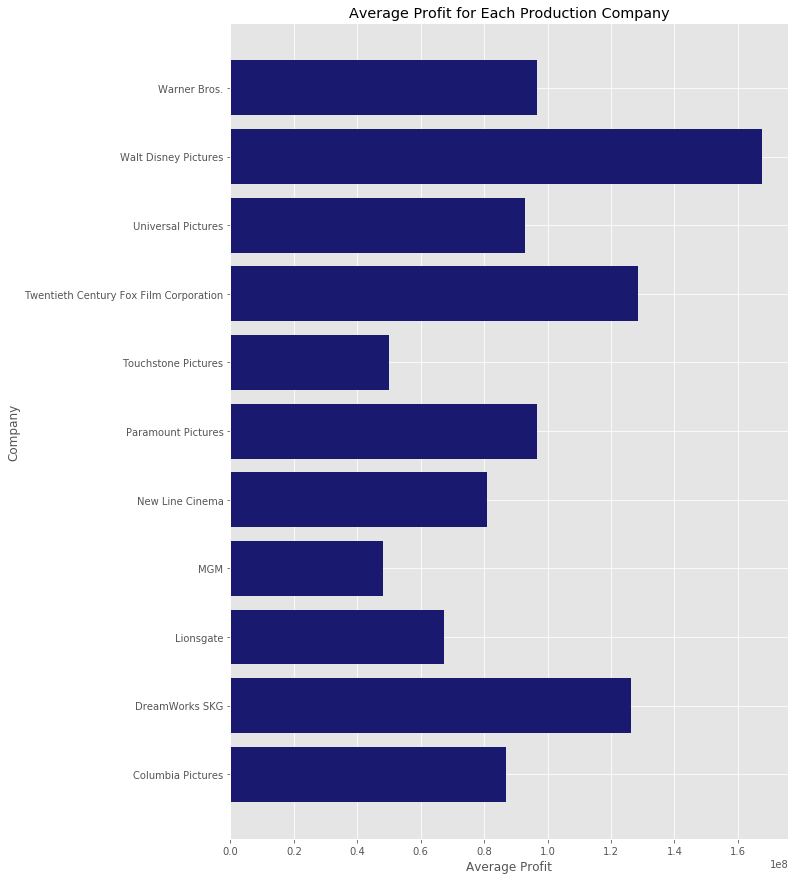

In [345]:
plt.barh(pc_labels,values,align='center',color='midnightblue')
plt.title("Average Profit for Each Production Company")
plt.ylabel('Company')
plt.xlabel('Average Profit')
rcParams['figure.figsize'] = (10,15)